In [5]:
import matplotlib.pyplot as plt

In [6]:
import cv2
import numpy as np

with open('ENET/enet-classes.txt') as f:
    classes = f.read().splitlines()

with open('ENET/enet-colors.txt') as f:
    colors = f.read().splitlines()
    colors = [np.array(col.split(',')).astype('int') for col in colors]
    colors = np.array(colors,dtype='uint8')

model = cv2.dnn.readNet('ENET/enet-model.net')

cap = cv2.VideoCapture('videos/pedestrian_cars.mp4')


In [7]:
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError('Cannot Open Video File')

In [8]:
classes

['Unlabeled',
 'Road',
 'Sidewalk',
 'Building',
 'Wall',
 'Fence',
 'Pole',
 'TrafficLight',
 'TrafficSign',
 'Vegetation',
 'Terrain',
 'Sky',
 'Person',
 'Rider',
 'Car',
 'Truck',
 'Bus',
 'Train',
 'Motorcycle',
 'Bicycle']

In [4]:
cap

< cv2.VideoCapture 000001B68A70E0B0>

In [5]:
success,img = cap.read()

In [6]:
type(img)

numpy.ndarray

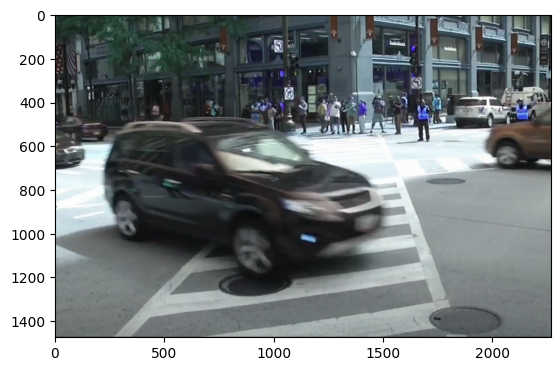

In [7]:
plt.imshow(img)

In [8]:
model

< cv2.dnn.Net 000001B6A2A6BE10>

In [9]:
while True:
    success,img = cap.read()
    # Using size (1024,512) as ENET was trained on (1024,512) input size images.
    blob = cv2.dnn.blobFromImage(img,1/255,(1024,512),0,True,False)
    model.setInput(blob)
    output = model.forward()
    
    (numClasses, height, width) = output.shape[1:4]
    
    classMap = np.argmax(output[0], axis=0)
    mask = colors[classMap]
    mask = cv2.resize(mask, (img.shape[1], img.shape[0]),interpolation=cv2.INTER_NEAREST)
    output = ((0.3 * img) + (0.7 * mask)).astype("uint8")
    cv2.imshow('Output',output)
    cv2.imshow('Input',img)
    if cv2.waitKey(1) & 0xff==ord('q'):
        break

KeyboardInterrupt: 